# Notebook E-tivity 3 CE4021 Task 1

Student name: Mitchell de Bruyn

Student ID: 23296828

<hr style=\"border:2px solid gray\"> </hr>

## Imports

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

 If you believe required imports are missing, please contact your moderator.

<hr style=\"border:2px solid gray\"> </hr>

## Task 1

You may add as many cells as you require to complete the task.

# Option 1 Rolling dice

Q: Rolling two 6-sided fair dice with the aim of determining the probability that the sum of the two dice is less than 3 or more than 10.

The answer here ranges from rolling (1, 1) giving 2 up to rolling (6, 6) giving the max value of 12. These are integers or whole numbers so it is a discrete random variable.

The probability for any given number when rolling a single die is alwasy the same (1/6) so we can model this using a uniform distribution. However 2 dice combined does not result in a uniform distribution. i.e.
(1, 1) can only happen in 1 way so not very likely, but rolling a total of 3 can happen in two ways (1, 2) or (2, 1) so this is more likely than rolling a total of 2 hence this in no longer a uniform distribution.
However when writing the code to model this we will only concern ourselves with rolling a single dice at a time (uniform probability distribution) but do it twice.

The total number of combinations when rolling two dice is 6 * 6 = 36

When rolling 2 dice and we can only get a probability of less than 3 we can get that in only one way: (1, 1)
Getting more than 10 can be achieved by rolling (5, 6), (6, 5) or (6, 6)

So there are 4 possible combinations that satisfy our requirement of less than 3 or more than 10.

This probability works out to be 4/36 or 1/9 - this is the answer we're hoping to get with our code.

In [2]:
dice_numbers = [1, 2, 3, 4, 5, 6]

# initialise all the keys to 0
dice_combinations_hist = {i+j: 0 for i in dice_numbers for j in dice_numbers}

# calculate the frequencies by counting each combination
for i in dice_numbers:
    for j in dice_numbers:
        dice_combinations_hist[i+j] += 1



In [3]:
dice_combinations_hist

{2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 5, 9: 4, 10: 3, 11: 2, 12: 1}

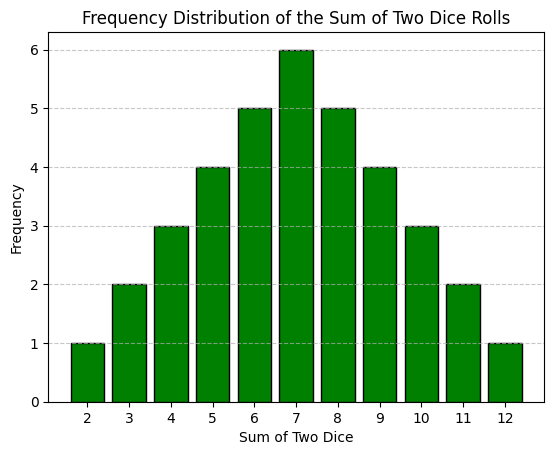

In [4]:
def plot_dice_frequency_hist(data: dict[int, int]):
    
    x = list(data.keys())
    y = list(data.values())
    
    # Create the plot
    plt.bar(x, y, color='green', edgecolor='black')
    plt.xlabel('Sum of Two Dice')
    plt.ylabel('Frequency')
    plt.title('Frequency Distribution of the Sum of Two Dice Rolls')
    plt.xticks(x)  # Ensure all sums are shown on x-axis
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Display the plot
    plt.show()

plot_dice_frequency_hist(dice_combinations_hist)

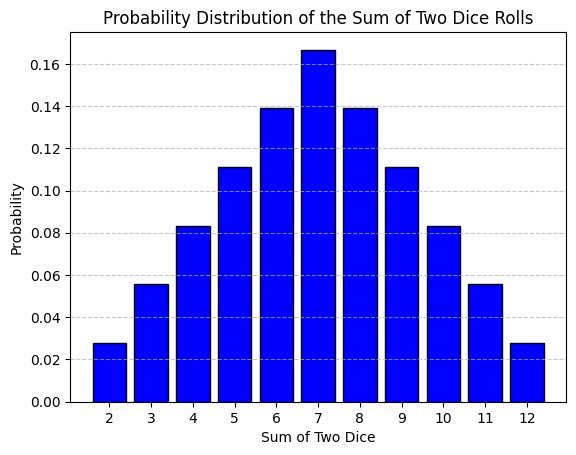

In [5]:
total_combinations = 0
for v in dice_combinations_hist.values():
    total_combinations += v

dice_probability_hist = {}
for k, v in dice_combinations_hist.items():
    dice_probability_hist[k] = v/total_combinations

x = list(dice_probability_hist.keys())
y = list(dice_probability_hist.values())

# Create the plot
plt.bar(x, y, color='blue', edgecolor='black')
plt.xlabel('Sum of Two Dice')
plt.ylabel('Probability')
plt.title('Probability Distribution of the Sum of Two Dice Rolls')
plt.xticks(x)  # Ensure all sums are shown on x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In [6]:
dice_probability_hist

{2: 0.027777777777777776,
 3: 0.05555555555555555,
 4: 0.08333333333333333,
 5: 0.1111111111111111,
 6: 0.1388888888888889,
 7: 0.16666666666666666,
 8: 0.1388888888888889,
 9: 0.1111111111111111,
 10: 0.08333333333333333,
 11: 0.05555555555555555,
 12: 0.027777777777777776}

In [7]:
# Proability of rolling less than 3 or more than 10:
dice_probability_hist[2]+dice_probability_hist[11]+dice_probability_hist[12]

0.1111111111111111

In [8]:
# Or we can look at the raw numbers:
(dice_combinations_hist[2]+dice_combinations_hist[11]+dice_combinations_hist[12]) / total_combinations

0.1111111111111111

# Numerical emulation using random

Now that we've seen how to calculate the answer, let's look at how to do this using the random function and emulate the experiment.

In [9]:
def roll_dice() -> int:
    """
    returns a random number from 1 to 6 to emulate rolling a fair die
    """
    return random.randint(1, 6)

In [10]:
def emulate_two_dice(n: int) -> dict[int, int]:
    """
    Emulate two dice will rolle 2 dice n times and record how many times each answer is seen
    input:
        n: int - number of time to do the emulation

    return:
        dict[int] dictionary of the possible answers as keys and the number of times the answer is seen as the values
    """

    result_hist = {i+j: 0 for i in range(1,7) for j in range(1,7)}

    for _ in range(n):
        ans = roll_dice() + roll_dice()
        result_hist[ans] += 1

    return result_hist

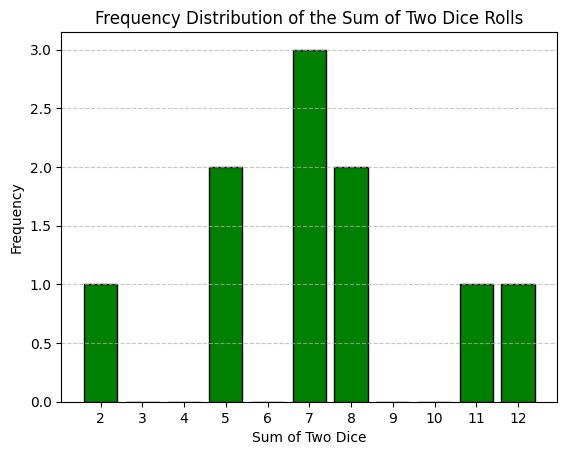

In [11]:
# Now let's try and run this emulation and look a the frequency graphs
plot_dice_frequency_hist(emulate_two_dice(10))
# This is horrible, looks nothing like the distribution we need.

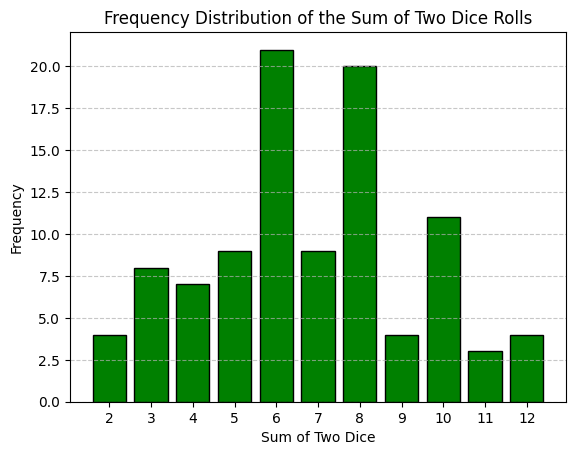

In [12]:
# Let's try 10 times more:
plot_dice_frequency_hist(emulate_two_dice(100))
# Still no good

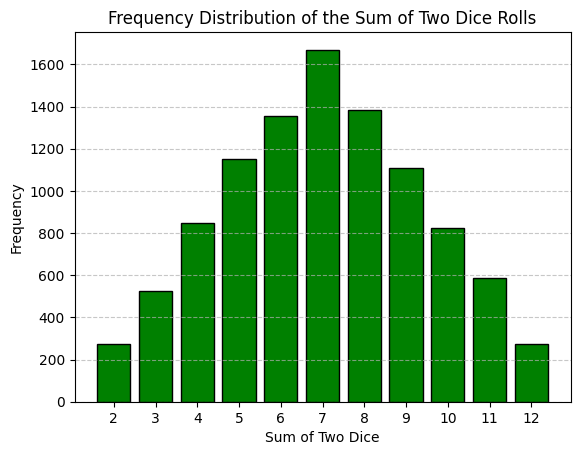

In [13]:
# Maybe 10K roles of the 2 dice
plot_dice_frequency_hist(emulate_two_dice(10000))
# Almost, but still not as symetric as we would expect

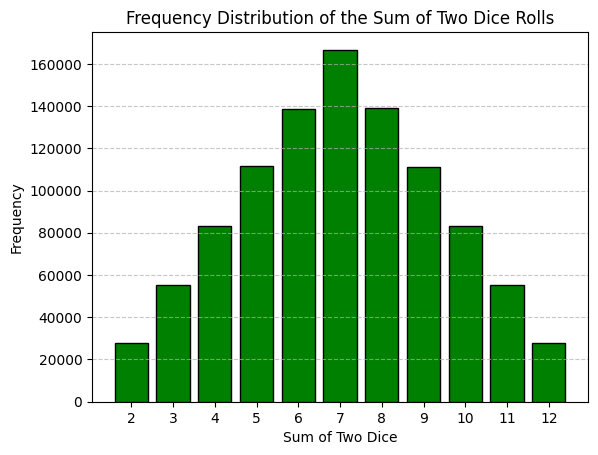

In [18]:
# Finally going to try with 1M roles of the two dice
dice_emulated_result = emulate_two_dice(1000000)
plot_dice_frequency_hist(dice_emulated_result)
# Close enought!!!

In [19]:
dice_emulated_result

{2: 27690,
 3: 55411,
 4: 83272,
 5: 111496,
 6: 138594,
 7: 166672,
 8: 139013,
 9: 111228,
 10: 83318,
 11: 55470,
 12: 27836}

In [22]:
# Now let's change this dataset into probabilities by dividing by the total number of throws:

dice_emulated_probability = {}
for k, v in dice_emulated_result.items():
    dice_emulated_probability[k] = dice_emulated_result[k] / 1000000

dice_emulated_probability

{2: 0.02769,
 3: 0.055411,
 4: 0.083272,
 5: 0.111496,
 6: 0.138594,
 7: 0.166672,
 8: 0.139013,
 9: 0.111228,
 10: 0.083318,
 11: 0.05547,
 12: 0.027836}

In [23]:
# Finally the probability of getting less than 3 or more than 10 is found by adding the probabilties:
dice_emulated_probability[2]+dice_emulated_probability[11]+dice_emulated_probability[12]

0.110996

<hr style=\"border:2px solid gray\"> </hr>

## Reflection

Write you reflection in below cell.